In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [4]:
df = pd.read_pickle("data/df_reduced.pkl")

In [15]:
def get_distributions(df:pd.DataFrame, col:str):
    dc = df[col]
    dc.plot.hist(bins=90)
    plt.show()
    plt.close()
    print(dc.describe())
    return dc

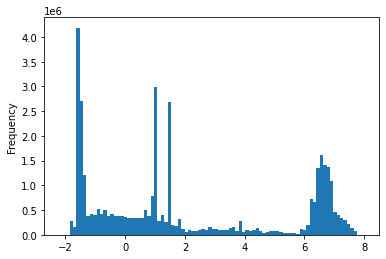

count    3.779235e+07
mean     2.037326e+00
std      3.237981e+00
min     -2.202500e+00
25%     -1.038500e+00
50%      1.033500e+00
75%      6.281500e+00
max      7.987500e+00
Name: cartesianZ, dtype: float64


In [16]:
dc  = get_distributions(df, "cartesianZ")

In [23]:
dc_hist = np.histogram(dc.values, bins=80)

In [27]:
hist_weights = dc_hist[0] / dc_hist[0].sum()

In [31]:
hist_centers = dc_hist[1]

In [37]:
sampled_data = np.random.choice(hist_centers[1:], size=10000, p = hist_weights)

In [44]:
gmm = GaussianMixture(5)
gmm = gmm.fit(sampled_data.reshape(-1,1))

In [54]:
floor_id = np.argmin(gmm.means_)
ceil_id = np.argmax(gmm.means_)

floor_cutoff = gmm.means_[floor_id] + np.sqrt(gmm.covariances_[floor_id])*2
ceil_cutoff = (gmm.means_[ceil_id] - np.sqrt(gmm.covariances_[ceil_id])*2).reshape(-1)[0]

In [55]:
floor_cutoff

array([[-1.33126361]])

In [56]:
ceil_cutoff

array([[6.06900835]])

In [57]:
df = df[df.cartesianZ > floor_cutoff]
df = df[df.cartesianZ < ceil_cutoff]


ValueError: ('Lengths must match to compare', (37792346,), (1, 1))